# 신용카드 사용자 연체 예측

## 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# train
train_df = pd.read_csv('./PData/new4_train_df.csv')
train_df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,4,0,1,1,2,1,5,1,0,0,0,2.0,0,1.0
1,0,0,1,1,4,0,4,0,1,1,5,1,0,0,1,3.0,0,1.0
2,1,1,1,0,6,4,1,1,1,3,5,1,0,1,0,2.0,1,2.0
3,0,0,1,0,4,0,4,1,1,2,5,1,0,1,0,2.0,2,0.0
4,0,1,1,0,3,2,1,1,1,2,5,1,0,0,0,2.0,1,2.0


In [3]:
# test
test_df = pd.read_csv('./PData/new4_test_df.csv')
test_df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,1,1,0,0,0,1,4,0,1,4,0,1,0,1,0,2.0,3
1,0,0,1,0,0,2,1,1,1,3,5,1,0,1,0,2.0,2
2,0,0,1,0,0,4,4,1,1,2,5,1,1,1,0,2.0,2
3,1,1,0,0,0,0,4,1,1,3,5,1,1,0,0,2.0,2
4,0,1,1,0,0,2,1,1,1,2,5,1,1,0,0,2.0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  int64  
 1   car            26457 non-null  int64  
 2   reality        26457 non-null  int64  
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  int64  
 5   income_type    26457 non-null  int64  
 6   edu_type       26457 non-null  int64  
 7   family_type    26457 non-null  int64  
 8   house_type     26457 non-null  int64  
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  FLAG_MOBIL     26457 non-null  int64  
 12  work_phone     26457 non-null  int64  
 13  phone          26457 non-null  int64  
 14  email          26457 non-null  int64  
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  int64  
 17  credit         26457 non-null  float64
dtypes: flo

In [5]:
test_df.shape

(10000, 17)

## 시각화를 통한 고객 현황 분석

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
train_df['credit'].unique()

array([1., 2., 0.])

In [8]:
sortCredit = train_df['credit'].value_counts()
sortCredit

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

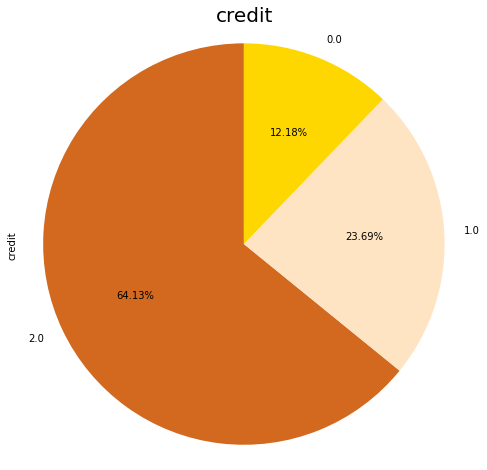

In [9]:
import seaborn as sns

# labels = train_df['Survived']
# colors = sns.color_palette('hls',len(labels))

sortCredit.plot(kind='pie',
                        figsize=(8,8),
                        autopct='%.2f%%', # 오토 퍼센트 계산기능
                        startangle=90,
                        colors=['chocolate','bisque','gold']
                       )
plt.title("credit", size=20)
plt.axis('equal') # 파이차트의 모양을 원에 가깝게 조정
plt.show()

In [10]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# 시각화 도구
from matplotlib import pyplot as plt
%matplotlib inline

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [11]:
train_df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,4,0,1,1,2,1,5,1,0,0,0,2.0,0,1.0
1,0,0,1,1,4,0,4,0,1,1,5,1,0,0,1,3.0,0,1.0
2,1,1,1,0,6,4,1,1,1,3,5,1,0,1,0,2.0,1,2.0
3,0,0,1,0,4,0,4,1,1,2,5,1,0,1,0,2.0,2,0.0
4,0,1,1,0,3,2,1,1,1,2,5,1,0,0,0,2.0,1,2.0


## 컬럼들과의 연관성 확인

In [12]:
train_df.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

In [13]:
# 컬럼들간의 상관계수
corrMap = train_df[['credit','gender', 'car', 'reality', 'child_num', 
                    'income_total', 'income_type', 'edu_type', 
                    'family_type', 'house_type', 'DAYS_BIRTH', 
                    'DAYS_EMPLOYED','FLAG_MOBIL', 'work_phone', 
                    'phone', 'email', 'family_size','begin_month']]
corrMap = corrMap.corr()
print(corrMap)

                 credit    gender       car   reality  child_num  \
credit         1.000000  0.001562  0.007761 -0.009387   0.002601   
gender         0.001562  1.000000  0.362320 -0.048927   0.077722   
car            0.007761  0.362320  1.000000 -0.016599   0.103876   
reality       -0.009387 -0.048927 -0.016599  1.000000  -0.000738   
child_num      0.002601  0.077722  0.103876 -0.000738   1.000000   
income_total   0.005448  0.223637  0.222815  0.030402   0.033149   
income_type   -0.008163  0.103083  0.048361 -0.048468   0.107564   
edu_type       0.013780  0.006351 -0.105567  0.011535  -0.052069   
family_type   -0.005230 -0.101969 -0.124280  0.028144  -0.168225   
house_type    -0.009023  0.067437  0.018617 -0.177957   0.024518   
DAYS_BIRTH     0.021310 -0.193494 -0.149991  0.124705  -0.334432   
DAYS_EMPLOYED  0.003429  0.174852  0.160356 -0.097999   0.234996   
FLAG_MOBIL          NaN       NaN       NaN       NaN        NaN   
work_phone    -0.003134  0.064316  0.026124 -0.2

In [14]:
mask = np.array(corrMap)
mask[np.tril_indices_from(corrMap)] = False

<AxesSubplot:>

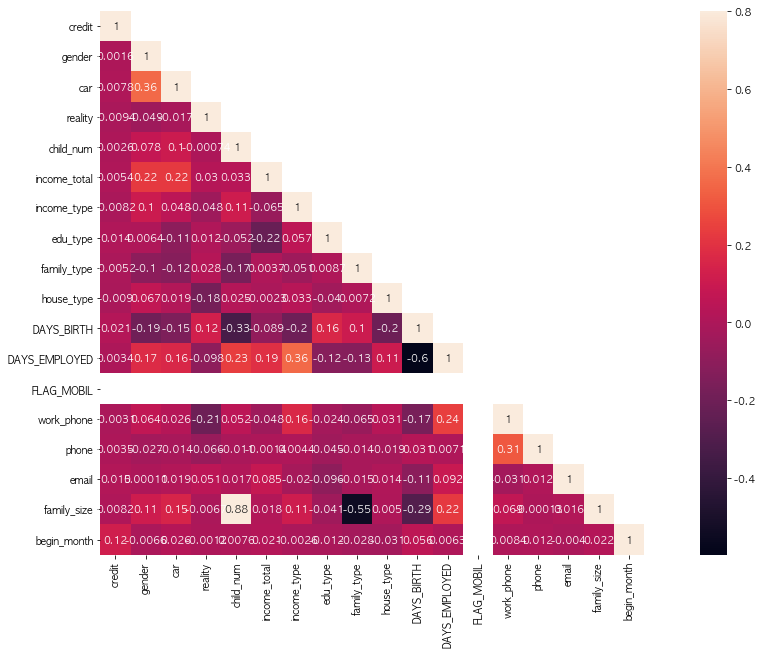

In [15]:
# 상관 계수의 Heat Map
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMap, mask=mask, vmax=0.8, square=True, annot=True) # 대각선 안쪽만 출력
#sns.heatmap(corrMatt, vmax=0.8, square=True, annot=True) # 정사각형
#sns.heatmap(corrMatt, vmax=0.8, square=False, annot=True) # 직사각형

## 결과 도출을 위한 전처리

In [16]:
# 결측치(Nan, Null, Na)확인
train_df.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

In [17]:
train_df.isna().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

----
## 예측모델 생성

In [18]:
# 라이브러리
from sklearn.tree import DecisionTreeClassifier # 의사결정 나무
from sklearn.model_selection import train_test_split # Sampling
from sklearn import metrics # 정확도 측정

In [19]:
# 원본두고 복사본 생성
train_df_T = train_df.copy()

In [20]:
# train과 test의 비율을 7:3의 비율로 분리하여 사용
# 랜덤값을 고정
train, test = train_test_split(train_df_T, test_size=0.3, random_state=0)

In [21]:
train_df_T.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

In [22]:
target_col = ['gender', 'car', 'reality', 'child_num', 'income_total', 'income_type',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size',
       'begin_month']

In [23]:
# train data
train_X = train[target_col]
train_y = train['credit']

In [24]:
# test data
test_X = test[target_col]
test_y = test['credit']

## 의사결정 나무 --> 57%

In [25]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(train_X, train_y)
dt_pre = dt_clf.predict(test_X)
dt_ac_score = metrics.accuracy_score(test_y, dt_pre)
print('Decision Tree :', dt_ac_score)

Decision Tree : 0.5686570924666162


In [26]:
y_pred = dt_clf.predict(test_X)
y_pred

array([1., 0., 1., ..., 2., 2., 2.])

In [27]:
# 정답확인
print('테스트 세트의 정확도 : %.2f'%np.mean(y_pred == test_y))

테스트 세트의 정확도 : 0.57


In [28]:
pd.crosstab(y_pred, test_y).style.background_gradient(cmap='summer_r')

credit,0.0,1.0,2.0
row_0,,,
0.0,268,242,571
1.0,194,785,1083
2.0,489,845,3461


In [29]:
# 신용도 0의 오답 비율
(191+493) / (267+191+493)

0.7192429022082019

In [30]:
# 신용도 1의 오답 비율
(247+839) / (786+247+839)

0.5801282051282052

In [31]:
# 신용도 2의 오답 비율
(563+1084) / (3468+563+1084)

0.32199413489736073

## KNN --> 58%

In [32]:
from sklearn.neighbors import KNeighborsClassifier # KNN

nn_clf = KNeighborsClassifier(3)
nn_clf.fit(train_X, train_y) # 데이터 학습 시키기
nn_pre = nn_clf.predict(test_X)
nn_ac_score = metrics.accuracy_score(test_y, nn_pre)
print('KNN :', nn_ac_score)

KNN : 0.5802469135802469


In [33]:
y_pred = nn_clf.predict(test_X)
print(y_pred)

[1. 0. 1. ... 2. 2. 2.]


In [34]:
# 정답 확인

print('테스트 세트의 정확도 : %.2f'%np.mean(y_pred == test_y))

테스트 세트의 정확도 : 0.58


In [35]:
pd.crosstab(y_pred, test_y).style.background_gradient(cmap='summer_r')

credit,0.0,1.0,2.0
row_0,,,
0.0,256,295,601
1.0,131,568,732
2.0,564,1009,3782


## Gaussian Process

In [36]:
# 오류발생으로 잠금
# from sklearn.gaussian_process import GaussianProcessClassifier # Gaussian Process

# gp_clf = GaussianProcessClassifier()
# gp_clf.fit(train_X, train_y) # 데이터 학습 시키기
# gp_pre = gp_clf.predict(test_X)
# gp_ac_score = metrics.accuracy_score(test_y, gp_pre)
# print('Gaussian Process :', gp_ac_score)

KeyboardInterrupt: 

## Random Forest

## SVM